# Importing libraries

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, optimizers

import pandas as pd
import numpy as np
import pdb
from google.colab import files
import io
import cv2,glob
from os import listdir
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.models import Model
import pdb
from keras.models import load_model


%matplotlib inline

#Mounting Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Displaying a image from new testing set

A sample file name: img2.jpg
Shape information of two arbitrary images: (1024, 1024, 3) - this one is shown below, and (1024, 1024, 3)


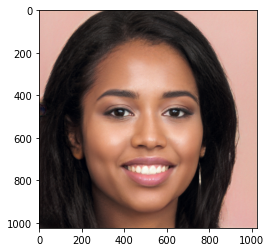

In [ ]:
dir_struct = '/content/drive/MyDrive/testImg/'  #path to the images

file_lst = listdir(dir_struct)

  
print('A sample file name: {}'.format(file_lst[1]))
image = cv2.imread(dir_struct+file_lst[1])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print('Shape information of two arbitrary images: {} - this one is shown below, and {}'.format(image.shape, cv2.imread(dir_struct+file_lst[1]).shape))
plt.imshow(image)

#Loading Images to an array

In [ ]:
items = glob.glob(dir_struct+'*') #loading images, make sure you only have images in the given folder
image_lst = []

for each_image in items:

   image = cv2.imread(each_image)
   image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
   image = cv2.resize(image, (32,32), interpolation = cv2.INTER_AREA)
   image_lst.append(image)





#Converting the image list to a numpy array

In [ ]:
imgdataset = np.array(image_lst)

#Normalizing the image data

In [ ]:
# # Normalizing
# imgdataset = imgdataset / 255.0

#Standardizing the image data

In [ ]:
#Standardizing 

def standardize(image_data):
        image_data = image_data.astype(float)
        mean = np.mean(image_data, axis=0)
        image_data -= mean
        std = np.std(image_data, axis=0)
        image_data /= std
        return image_data

imgdataset =   standardize(imgdataset)

#Predicting freakles using trained model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


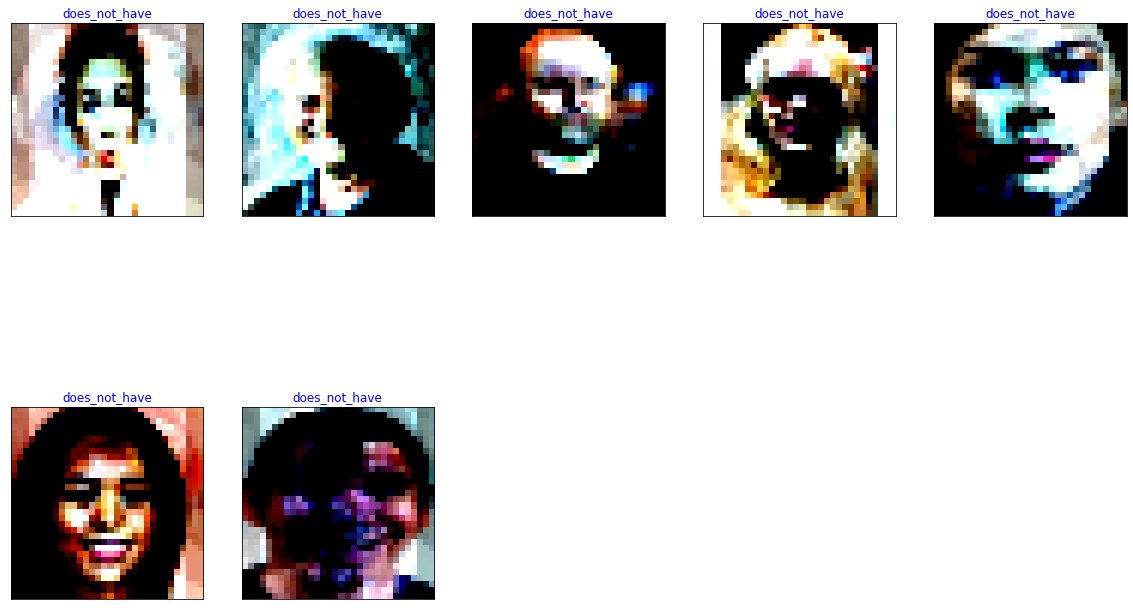

In [ ]:
filepath = "/content/drive/MyDrive/test1/freakles.h5" #load the path to freakles model

freakles_class_names = ['does_not_have', 'has']

model = load_model(filepath)
freakles_list = []

y_hat = model.predict(imgdataset)

# Plot a random sample of 7 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(imgdataset.shape[0], size=7, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(imgdataset[index]))
    predict_index = np.argmax(y_hat[index])
    
    freakles_list.append(predict_index)
    # Set the title for each image
    ax.set_title("{}".format(freakles_class_names[predict_index]),color=("blue"))

#Predicting glasses using trained model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


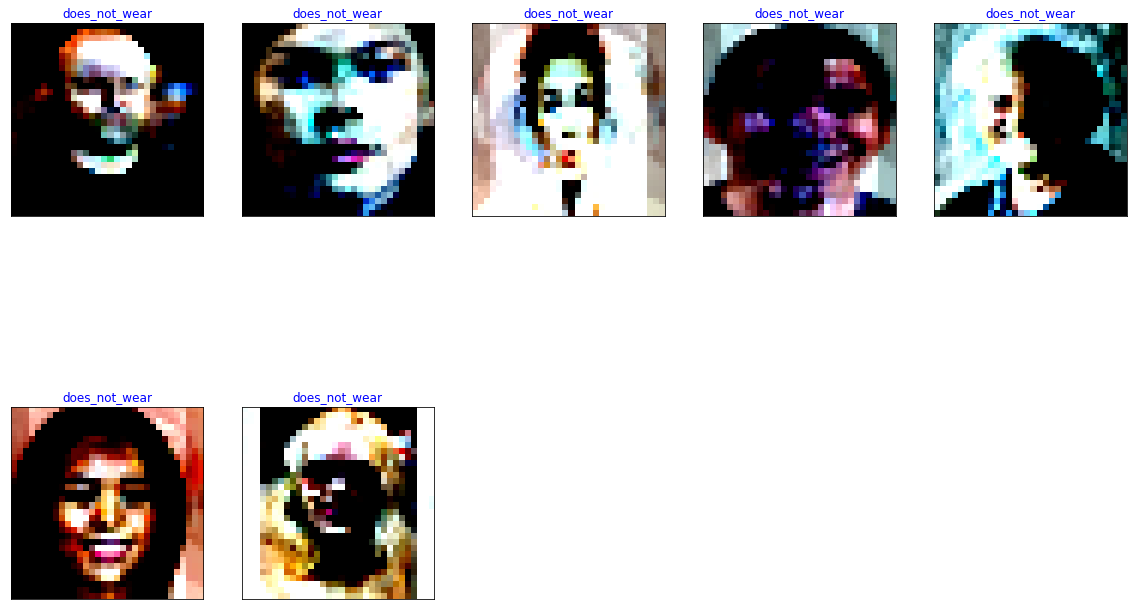

In [ ]:
filepath = "/content/drive/MyDrive/test1/glasses.h5" #load the path to glasses model

glasses_class_names = ['does_not_wear', 'wear_ normal', 'wear_sunglasses']

model = load_model(filepath)
glasses_list = []

y_hat = model.predict(imgdataset)

# Plot a random sample of 7 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(imgdataset.shape[0], size=7, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(imgdataset[index]))
    predict_index = np.argmax(y_hat[index])
    
    glasses_list.append(predict_index)
    # Set the title for each image
    ax.set_title("{}".format(glasses_class_names[predict_index]),color=("blue"))

#Predicting haircolor using trained model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


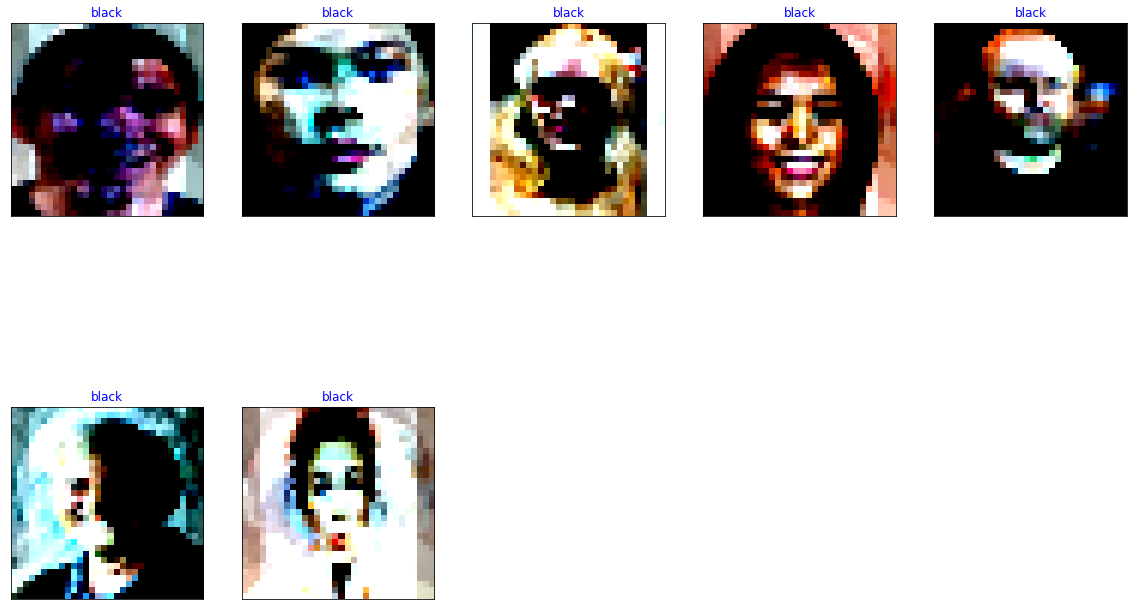

In [ ]:
filepath = "/content/drive/MyDrive/test1/haircolor.h5" #load the path to Haircolor model

haircolor_class_names = ['brown', 'black', 'gray', 'blond', 'red', 'white', 'mixed', 'other','not_visible']

model = load_model(filepath)
haircolor_list = []

y_hat = model.predict(imgdataset)

# Plot a random sample of 7 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(imgdataset.shape[0], size=7, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(imgdataset[index]))
    predict_index = np.argmax(y_hat[index])
    
    haircolor_list.append(predict_index)
    # Set the title for each image
    ax.set_title("{}".format(haircolor_class_names[predict_index]),color=("blue"))

#Predicting hair top using trained model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


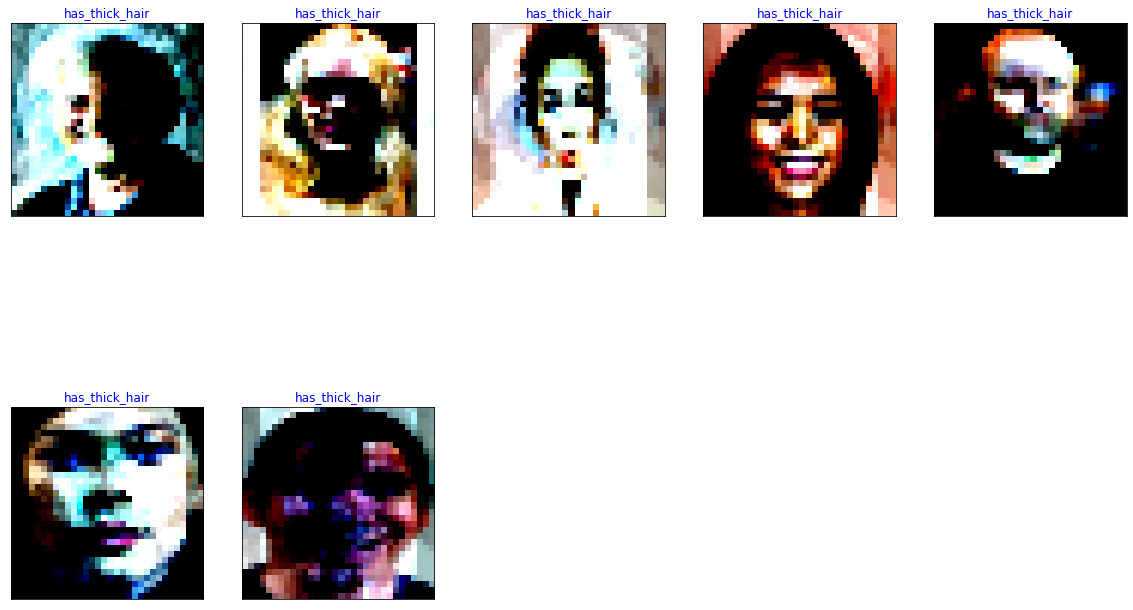

In [ ]:
filepath = "/content/drive/MyDrive/test1/hairtop.h5" #load the path to Hairtop model
hairtop_class_names = ['bald_or_shaved', 'has_few_hair', 'has_thick_hair', ' not_visible']

model = load_model(filepath)
hairtop_list = []

y_hat = model.predict(imgdataset)

# Plot a random sample of 7 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(imgdataset.shape[0], size=7, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(imgdataset[index]))
    predict_index = np.argmax(y_hat[index])
    hairtop_list.append(predict_index)
    # Set the title for each image
    ax.set_title("{}".format(hairtop_class_names[predict_index]),color=("blue"))

#Predicting wrinkles using trained model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


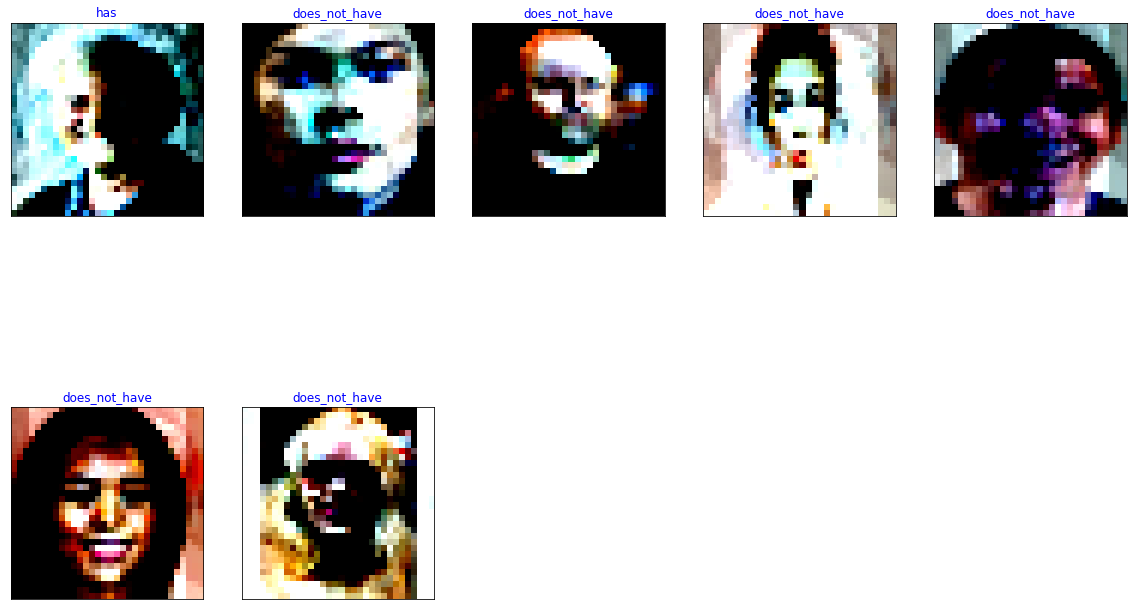

In [ ]:
filepath = "/content/drive/MyDrive/test1/wrinkles.h5" #load the path to wrinkles model

wrinkles_class_names = ['does_not_have', 'has']

model = load_model(filepath)
wrinkles_list = []

y_hat = model.predict(imgdataset)

# Plot a random sample of 7 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(imgdataset.shape[0], size=7, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(imgdataset[index]))
    predict_index = np.argmax(y_hat[index])
    
    wrinkles_list.append(predict_index)
    # Set the title for each image
    ax.set_title("{}".format(wrinkles_class_names[predict_index]),color=("blue"))

#Loading predictions to a dataframe

In [ ]:
read_file1 = pd.DataFrame()
read_file1['Image names'] = file_lst
read_file1['wrinkles'] = wrinkles_list
read_file1['freakles'] = freakles_list
read_file1['glasses'] = glasses_list
read_file1['hair color'] = haircolor_list
read_file1['hair top'] = hairtop_list


In [ ]:
read_file1

,Image names,wrinkles,freakles,glasses,hair color,hair top
0,img1.jpg,1,0,0,1,2
1,img2.jpg,0,0,0,1,2
2,img3.jpg,0,0,0,1,2
3,img5.jpg,0,0,0,1,2
4,img4.jpg,0,0,0,1,2
5,img6.jpg,0,0,0,1,2
6,img7.jpg,0,0,0,1,2


#Saving predictions to a csv

In [ ]:
read_file1.to_csv (r'/content/predictedAnnotations.csv', index=None)